# Qno.1

In [1]:
import numpy as np
from astroML.stats import median_sigmaG
from astroML.resample import bootstrap
import scipy.stats as sp
import matplotlib.pyplot as plt

In [2]:
#Generating 10,000 bootstrap samples of size 1000 from a Gaussian distribution
np.random.seed(10)
sample_data = np.random.normal(0, 1, 1000)
median_data, _ = bootstrap(sample_data, 10000, median_sigmaG, kwargs ={'axis' : 1})
mean_data = np.mean(median_data)
sigma_data = np.sqrt(np.pi/2000)

In [3]:
#Gaussian distribution with the same mean and standard deviation
gauss_x = np.linspace (np.min(median_data) ,np.max(median_data) ,2000)
dist = sp.norm(mean_data, sigma_data)
gauss_y = dist.pdf(gauss_x)

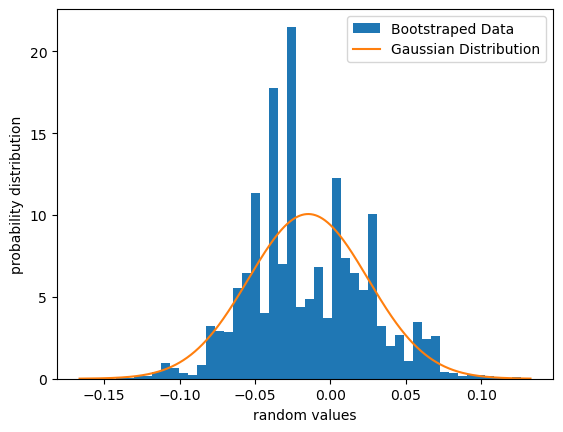

In [4]:
#plotting both gaussian distribution and histogram of medians
plt.hist(median_data, bins=50, density=True, label = 'Bootstraped Data')
plt.plot(gauss_x, gauss_y, label = 'Gaussian Distribution')
plt.xlabel('random values')
plt.ylabel('probability distribution')
plt.legend()
plt.show()

# Qno.2

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [6]:
#defining the model function to minimize
def min_model(x, b, m):
    return b*x + m

In [7]:
#data from the table
x_data = [203, 58, 210, 202, 198, 158, 165, 201, 157, 131,
     166, 160, 186, 125, 218, 146]
y_data = [495, 173, 479, 504, 510, 416, 393, 442, 317, 311,
          400, 337, 423, 334, 533, 344]
sigmay_data =  [21, 15, 27, 14,30, 16, 14, 25, 52, 16, 34, 
                31, 42, 26, 16, 22]


In [8]:
#minimizing by using curvefit
popt, pcov = curve_fit(min_model, x_data, y_data)
m, b = popt

In [9]:
#getting the data for x and y axis of the plot
x = np.linspace(0,270,50)
y = min_model(x, m, b)

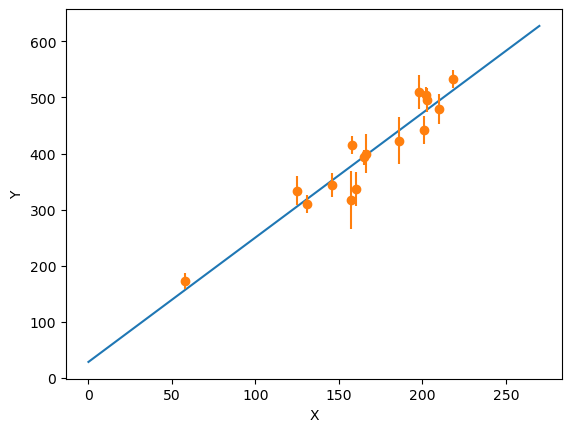

In [10]:
#output
plt.plot(x, y)
plt.errorbar(x_data, y_data, yerr = sigmay_data, fmt='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Qno.3

In [11]:
from scipy.stats import chi2

In [12]:
#data from the graph
data = [0.96, 0.24, 3.84, 2.85]
#DOf value
dof = 50-1
#chisquare values
chi2_values = [0] * 4
for i in range (0,4):
    chi2_values[i] = data[i] * dof

In [13]:
#p-values
p_values = [0] * 4
for i in range(0,4):
    p_values[i] = (1 - chi2(dof).cdf(chi2_values[i]))

In [14]:
#output
models = ["correct", "underestimated", "overestimated", "incorrect"]
for i in range(0,4):
    print("The P-Value of "+models[i]+" is : "+str(p_values[i]))

The P-Value of correct is : 0.5529264339960218
The P-Value of underestimated is : 0.9999999917009567
The P-Value of overestimated is : 0.0
The P-Value of incorrect is : 1.2107292945984227e-10
